In [1]:
#importing the needed modules to conduct an OLS regression

import pandas as pd
import statsmodels.api as sm 
import math
import numpy as np 
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime
from matplotlib import style
style.use('ggplot')
from dateutil import parser

In [311]:
df=pd.read_csv(r'C:\Users\mingj\OneDrive\Desktop\daily.csv')
df=df.dropna()
df.set_index("Date", inplace = True)


In [312]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
02/01/2009,2.203,2.417,2.159,2.416,2.416,0.0
05/01/2009,2.485,2.520,2.409,2.488,2.488,0.0
06/01/2009,2.557,2.614,2.467,2.505,2.505,0.0
07/01/2009,2.474,2.537,2.455,2.494,2.494,0.0
08/01/2009,2.441,2.494,2.408,2.445,2.445,0.0
...,...,...,...,...,...,...
20/12/2019,1.935,1.940,1.915,1.917,1.917,0.0
23/12/2019,1.912,1.940,1.898,1.935,1.935,0.0
26/12/2019,1.912,1.921,1.896,1.905,1.905,0.0


In [313]:
df=pd.DataFrame(df['Close'])
df

,Close
Date,
02/01/2009,2.416
05/01/2009,2.488
06/01/2009,2.505
07/01/2009,2.494
08/01/2009,2.445
...,...
20/12/2019,1.917
23/12/2019,1.935
26/12/2019,1.905


In [314]:
forecast_col = 'Close'

In [315]:
forecast_out = int(math.ceil(0.001*len(df)))
forecast_out

3

In [316]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [317]:
df

,Close,label
Date,,
02/01/2009,2.416,2.494
05/01/2009,2.488,2.445
06/01/2009,2.505,2.407
07/01/2009,2.494,2.309
08/01/2009,2.445,2.297
...,...,...
20/12/2019,1.917,1.874
23/12/2019,1.935,1.895
26/12/2019,1.905,NaN


In [318]:
df=df.dropna()

In [319]:
df.tail()

,Close,label
Date,,
17/12/2019,1.889,1.917
18/12/2019,1.924,1.935
19/12/2019,1.908,1.905
20/12/2019,1.917,1.874
23/12/2019,1.935,1.895


In [320]:
X = np.array(df.drop(['label'],1))

In [321]:
X = preprocessing.scale(X)

In [40]:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [322]:
y = np.array(df['label'])

In [323]:
y = np.array(df['label'])

In [324]:
df.dropna(inplace = True)

C:\Users\mingj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [325]:
print(len(X), len(y))

2740 2740


In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [327]:
clf = LinearRegression(n_jobs=-1)

In [328]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [329]:
accuracy = clf.score(X_test, y_test)

In [330]:
print(accuracy)

0.9790998871100655


In [331]:
 forecast_set = clf.predict(X_lately)

In [332]:
print(forecast_set, accuracy, forecast_out)

[1.91303996 1.92195699 1.93979106] 0.9790998871100655 3


In [333]:
df['Forecast'] = np.nan

C:\Users\mingj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [334]:
last_date = df.iloc[-1].name


In [335]:
dt =parser.parse(last_date)

In [336]:
last_unix = dt.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [337]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix = one_day
    df.loc[next_date] = [np.nan for _ in range (len(df.columns)-1)]+[i]


C:\Users\mingj\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mingj\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


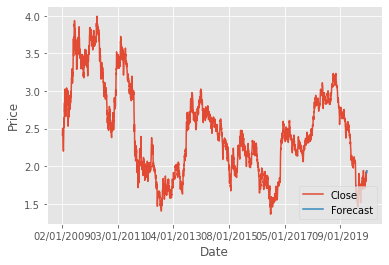

In [340]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()